In [196]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)


from collections import Counter, defaultdict


from sklearn import preprocessing
# from sklearn import manifold
from sklearn.cluster import KMeans, Birch, DBSCAN



from sklearn import metrics

from scipy.stats import sem, t
from scipy import mean

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler



In [197]:
df = pd.read_csv('daily data.csv')
df.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,conditions,Ozono (µg/m3),Dióxido de Azoto (µg/m3),Óxidos de Azoto (µg/m3),Monóxido de Azoto (µg/m3),pollen_intensity,admission number,risk level
0,2019-01-01,16.0,7.6,11.5,16.0,6.6,11.4,5.1,66.2,0.000,...,10.3,5,Clear,12.0,42.45,54.55,7.50,good,5,high risk
1,2019-01-02,15.9,7.6,10.9,15.9,6.2,10.5,7.4,80.2,0.000,...,4.8,3,Clear,25.0,39.70,46.30,3.65,good,3,moderate risk
2,2019-01-03,10.3,4.5,7.4,10.3,2.2,6.3,6.1,91.7,0.005,...,10.2,5,Rain,9.0,34.90,76.95,26.65,good,1,low risk
3,2019-01-04,13.1,6.6,9.7,13.1,4.1,8.7,6.9,84.1,0.000,...,8.8,5,Clear,22.0,36.35,55.10,3.10,good,5,high risk
4,2019-01-05,14.8,7.8,10.5,14.8,6.0,9.9,5.5,71.4,0.000,...,11.1,5,Clear,34.5,31.75,39.15,2.55,good,2,moderate risk


In [198]:
df.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'windgust', 'windspeed', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'conditions', 'Ozono (µg/m3)', 'Dióxido de Azoto (µg/m3)',
       'Óxidos de Azoto (µg/m3)', 'Monóxido de Azoto (µg/m3)',
       'pollen_intensity', 'admission number', 'risk level'],
      dtype='object')

In [199]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,Ozono (µg/m3),Dióxido de Azoto (µg/m3),Óxidos de Azoto (µg/m3),Monóxido de Azoto (µg/m3),admission number
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,...,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,20.847588,13.315789,16.593860,20.793640,13.047588,16.497588,10.912719,71.957895,1.378419,38.815789,...,12.560088,10.751974,175.869079,15.179605,6.313596,52.000000,18.062719,23.461952,3.079496,2.412281
std,5.289774,3.851926,4.270065,5.184057,4.258638,4.350528,3.923154,14.455105,4.355401,48.786607,...,16.688511,1.401160,85.687420,7.412446,2.239582,21.118608,12.408379,19.431590,5.104045,1.812345
min,10.300000,4.500000,7.400000,10.300000,2.200000,6.200000,-3.200000,24.100000,0.000000,0.000000,...,0.000000,2.200000,11.100000,0.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.900000,10.500000,13.600000,16.900000,10.500000,13.500000,8.275000,63.075000,0.000000,0.000000,...,2.800000,10.400000,111.800000,9.500000,5.000000,38.000000,8.987500,10.987500,0.700000,1.000000
50%,19.750000,12.650000,15.900000,19.750000,12.650000,15.900000,10.800000,72.000000,0.000000,0.000000,...,6.400000,11.000000,171.350000,14.900000,7.000000,54.750000,14.050000,17.025000,1.400000,2.000000
75%,24.400000,16.700000,19.925000,24.400000,16.700000,19.925000,14.025000,82.225000,0.287000,100.000000,...,12.350000,11.700000,245.050000,21.200000,8.000000,66.000000,23.937500,29.312500,3.112500,3.000000
max,35.200000,23.000000,28.600000,35.700000,23.000000,28.400000,21.000000,99.300000,39.750000,100.000000,...,93.200000,12.600000,348.000000,30.000000,10.000000,110.000000,63.200000,124.750000,43.450000,9.000000


In [200]:
df.isna().sum()

datetime                       0
tempmax                        0
tempmin                        0
temp                           0
feelslikemax                   0
feelslikemin                   0
feelslike                      0
dew                            0
humidity                       0
precip                         0
precipprob                     0
precipcover                    0
windgust                     256
windspeed                      0
sealevelpressure               0
cloudcover                     0
visibility                     0
solarradiation                 0
solarenergy                    0
uvindex                        0
conditions                     0
Ozono (µg/m3)                  0
Dióxido de Azoto (µg/m3)       0
Óxidos de Azoto (µg/m3)        0
Monóxido de Azoto (µg/m3)      0
pollen_intensity               0
admission number               0
risk level                     0
dtype: int64

## dropping unwanted columns

In [201]:
toDrop = ['data_admissao', 'tempmax', 'tempmin', 'temp', 'dicofre', 'distrito', 'concelho', 'freguesia', 'regiao', 'nacionalidade',
         'cod_proveniencia', 'proveniencia', 'cod_causa', 'causa', 'cod_destino', 'destino',
         'diagnostico', 'classe', 'asma', 'date', 'name','snow', 'snowdepth', 'winddir', 'cor',
         'severerisk', 'sunrise', 'sunset', 'stations', 'icon', 'description', 'preciptype',
         'moonphase', 'windgust', 'feelslikemax', 'feelslikemin', 'feelslike', 'uvindex', 'dew',
         'precipprob', 'precip', 'humidity', 'precip', 'precipprob','precipcover', 'windgust',
          'windspeed', 'sealevelpressure','cloudcover', 'visibility', 'solarradiation', 'solarenergy',
          'uvindex', 'conditions', 'precipcover', 'visibility', 'solarradiation', 'solarenergy',
          'sealevelpressure', 'cloudcover']

In [202]:
for col in df:
    if col  in toDrop:
        df.drop(col, axis=1, inplace=True)

## Encode categorical columns into numbers

In [203]:
# # conditions
# # pollen_intensity

# # Get one hot encoding of columns conditions
# one_hot = pd.get_dummies(df['conditions'])
# # Drop column conditions as it is now encoded
# df = df.drop('conditions',axis = 1)
# # Join the encoded df
# df = df.join(one_hot)
# df

In [204]:
df['pollen_intensity'].value_counts()

good              351
muito elevados     56
elevados           28
baixos             21
Name: pollen_intensity, dtype: int64

In [205]:
for i in range(len(df['pollen_intensity'])):
    if df.loc[i, 'pollen_intensity'] == 'good':
        df.loc[i, 'pollen_intensity'] = 1
    elif df.loc[i, 'pollen_intensity'] == 'baixos':
        df.loc[i, 'pollen_intensity'] = 2
    elif df.loc[i, 'pollen_intensity'] == 'elevados':
        df.loc[i, 'pollen_intensity'] = 3
    elif df.loc[i, 'pollen_intensity'] == 'muito elevados':
        df.loc[i, 'pollen_intensity'] = 4
df['pollen_intensity'].value_counts()

1    351
4     56
3     28
2     21
Name: pollen_intensity, dtype: int64

In [206]:
# ## Adding feature
# df['tem amplitude'] = df['tempmax'] - df['tempmin']
# df.drop(['tempmax', 'tempmin'], axis=1, inplace=True)

In [207]:
X = pd.DataFrame()
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
        X[col] = df[col]
    except:
        print(col)
X.drop(['admission number'], axis=1, inplace=True)
# X

datetime
risk level


## Target

In [208]:
# tempChange = []
# for i in range(len(X)):
#     try:
# #         print(X.loc[i, 'temp'] , X.loc[i-1, 'temp'],(X.loc[i, 'temp'] - X.loc[i-1, 'temp']))
#         tempChange.append((X.loc[i, 'temp'] - X.loc[i-1, 'temp']))
# #         break
#     except:
#         tempChange.append(0)
        
# X['temp cahnge'] = tempChange

# X[['tem amplitude', 'admission number', 'temp cahnge', 'temp', 'humidity']].corr()

In [209]:
# X.plot.scatter('temp cahnge', 'admission number')

In [210]:
# tempChange2 = []
# for i in range(len(X)):
#     try:
# #         print(X.loc[i, 'temp'] , X.loc[i-1, 'temp'],(X.loc[i, 'temp'] - X.loc[i-1, 'temp']))
#         tempChange2.append((X.loc[i, 'temp'] - X.loc[i-2, 'temp']))
# #         break
#     except:
#         tempChange2.append(0)
        
# X['temp cahnge2'] = tempChange2

# X.plot.scatter('temp cahnge2', 'admission number')

In [211]:
# high risk
# moderate risk
# low risk

In [212]:
y = [1 if risk=='low risk' else 2 if risk=='moderate risk' else 3 for risk in df['risk level']]
Counter(y)
# y = []

Counter({3: 111, 2: 183, 1: 162})

In [213]:
colors = np.array(['g', 'r', 'b', 'c', 'k', 'y','royalblue', 'maroon', 'forestgreen',
                   'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy'])

In [214]:
scaler = MinMaxScaler()
xcolumns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=xcolumns)

In [215]:
########## PCA of visualization
pca_model = PCA(n_components=2)
X_PCA = pca_model.fit_transform(X)

In [216]:

#### kmeans algorithm
### Choosing best Num cluster for KMeans
for NumbOfcluster in range(2, 20):
    kmean = KMeans(n_clusters=NumbOfcluster)
    kmean.fit(X)
    labels = kmean.labels_
    KMeans_Sil = metrics.silhouette_score(X, kmean.labels_, metric='euclidean')
    print('NumbOfcluster: ',NumbOfcluster , '  Kmeans silhouette ',KMeans_Sil)

NumbOfcluster:  2   Kmeans silhouette  0.5995944985101641
NumbOfcluster:  3   Kmeans silhouette  0.5526532966998516
NumbOfcluster:  4   Kmeans silhouette  0.453808552752709
NumbOfcluster:  5   Kmeans silhouette  0.4357812675003302
NumbOfcluster:  6   Kmeans silhouette  0.3804231139370031
NumbOfcluster:  7   Kmeans silhouette  0.3993738071515438
NumbOfcluster:  8   Kmeans silhouette  0.39773807818157825
NumbOfcluster:  9   Kmeans silhouette  0.38499271442106353
NumbOfcluster:  10   Kmeans silhouette  0.3463822186090982
NumbOfcluster:  11   Kmeans silhouette  0.33693161173406433
NumbOfcluster:  12   Kmeans silhouette  0.3316268004390876
NumbOfcluster:  13   Kmeans silhouette  0.3492232589604569
NumbOfcluster:  14   Kmeans silhouette  0.35258437237214685
NumbOfcluster:  15   Kmeans silhouette  0.3516565279314738
NumbOfcluster:  16   Kmeans silhouette  0.35071632673916414
NumbOfcluster:  17   Kmeans silhouette  0.35274683967385106
NumbOfcluster:  18   Kmeans silhouette  0.3475690065912233


In [217]:

#### kmeans algorithm
# start = time.time()
kmean = KMeans(n_clusters=3, max_iter=200)
kmean.fit(X)
# end = time.time()
# print(Fore.BLUE + "k-mean algorithm time is :", end - start)
# print(Fore.RESET)

KMeans(max_iter=200, n_clusters=3)

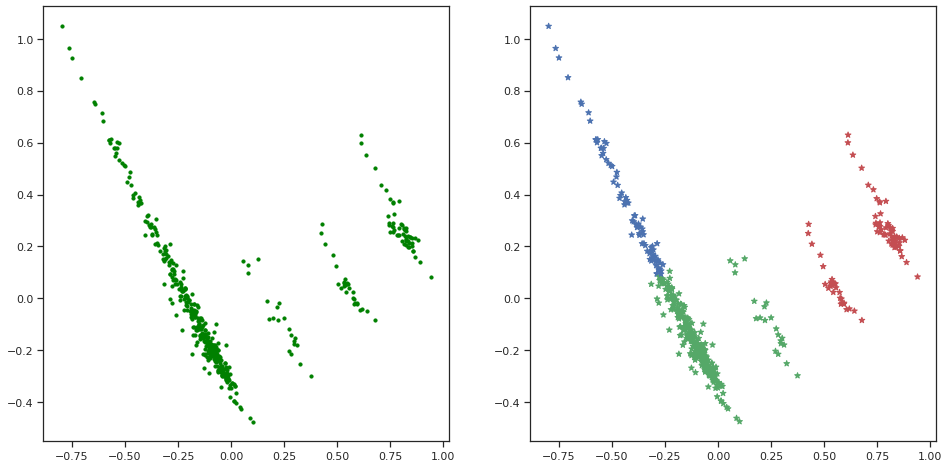

In [218]:

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[kmean.labels_], marker='*')

In [219]:

#### Birch algorithm
### Choosing best Num cluster for Birch
for NumbOfcluster in range(2, 25):
    birch = Birch(n_clusters=NumbOfcluster)
    birch.fit(X)
    labels = birch.labels_
    
    birch_Sil = metrics.silhouette_score(X, birch.labels_, metric='euclidean')
    print('NumbOfcluster: ',NumbOfcluster ,' Birch silhouette ',KMeans_Sil)

NumbOfcluster:  2  Birch silhouette  0.3520026698583282
NumbOfcluster:  3  Birch silhouette  0.3520026698583282
NumbOfcluster:  4  Birch silhouette  0.3520026698583282
NumbOfcluster:  5  Birch silhouette  0.3520026698583282
NumbOfcluster:  6  Birch silhouette  0.3520026698583282
NumbOfcluster:  7  Birch silhouette  0.3520026698583282
NumbOfcluster:  8  Birch silhouette  0.3520026698583282
NumbOfcluster:  9  Birch silhouette  0.3520026698583282
NumbOfcluster:  10  Birch silhouette  0.3520026698583282
NumbOfcluster:  11  Birch silhouette  0.3520026698583282
NumbOfcluster:  12  Birch silhouette  0.3520026698583282
NumbOfcluster:  13  Birch silhouette  0.3520026698583282
NumbOfcluster:  14  Birch silhouette  0.3520026698583282


/home/amin/.local/lib/python3.8/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(
/home/amin/.local/lib/python3.8/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (4). Decrease the threshold.
  warnings.warn(
/home/amin/.local/lib/python3.8/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (5). Decrease the threshold.
  warnings.warn(
/home/amin/.local/lib/python3.8/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (6). Decrease the threshold.
  warnings.warn(
/home/amin/.local/lib/python3.8/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (7). Decrease the threshold.
  warnings.warn(
/home/amin/.loc

NumbOfcluster:  15  Birch silhouette  0.3520026698583282
NumbOfcluster:  16  Birch silhouette  0.3520026698583282
NumbOfcluster:  17  Birch silhouette  0.3520026698583282
NumbOfcluster:  18  Birch silhouette  0.3520026698583282
NumbOfcluster:  19  Birch silhouette  0.3520026698583282
NumbOfcluster:  20  Birch silhouette  0.3520026698583282
NumbOfcluster:  21  Birch silhouette  0.3520026698583282
NumbOfcluster:  22  Birch silhouette  0.3520026698583282
NumbOfcluster:  23  Birch silhouette  0.3520026698583282
NumbOfcluster:  24  Birch silhouette  0.3520026698583282


/home/amin/.local/lib/python3.8/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (16). Decrease the threshold.
  warnings.warn(
/home/amin/.local/lib/python3.8/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (17). Decrease the threshold.
  warnings.warn(
/home/amin/.local/lib/python3.8/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (18). Decrease the threshold.
  warnings.warn(
/home/amin/.local/lib/python3.8/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (19). Decrease the threshold.
  warnings.warn(
/home/amin/.local/lib/python3.8/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (20). Decrease the threshold.
  warnings.warn(
/home/amin

In [220]:

#### kmeans algorithm
# start = time.time()
birch = Birch(n_clusters=3)
birch.fit(X)
# end = time.time()
# print(Fore.BLUE + "k-mean algorithm time is :", end - start)
# print(Fore.RESET)

/home/amin/.local/lib/python3.8/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(


Birch()

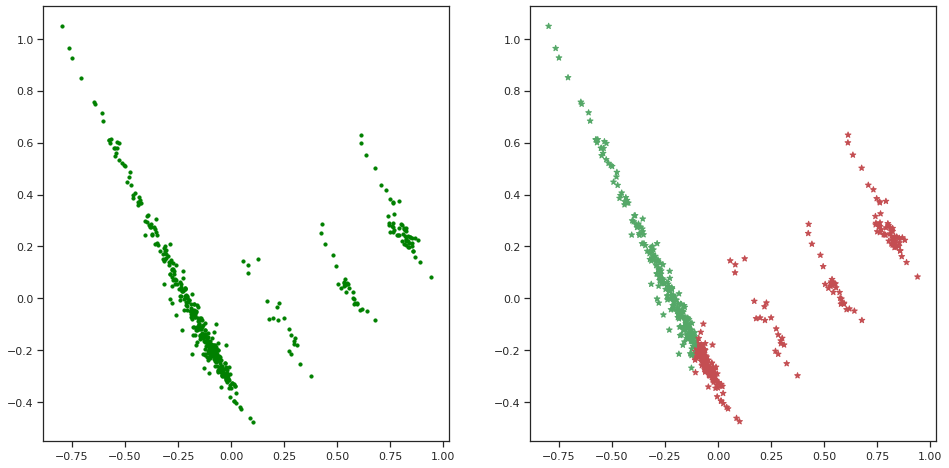

In [221]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[birch.labels_], marker='*')

In [222]:
# X.describe()

In [223]:
X

,Ozono (µg/m3),Dióxido de Azoto (µg/m3),Óxidos de Azoto (µg/m3),Monóxido de Azoto (µg/m3),pollen_intensity
0,0.109091,0.671677,0.437275,0.172612,0.0
1,0.227273,0.628165,0.371142,0.084005,0.0
2,0.081818,0.552215,0.616834,0.613349,0.0
3,0.200000,0.575158,0.441683,0.071346,0.0
4,0.313636,0.502373,0.313828,0.058688,0.0
...,...,...,...,...,...
451,0.763636,0.219937,0.124649,0.026467,0.0
452,0.700000,0.182753,0.104208,0.025316,0.0
453,0.622727,0.286392,0.175150,0.037975,0.0
454,0.509091,0.328323,0.191182,0.051784,0.0


In [224]:
try:
    X.drop(['Kmeans label', 'birch','dbscan', 'risk level'],axis=1, inplace=True) 
except:
    1

#### kmeans algorithm
# start = time.time()
dbscan = DBSCAN(eps=.25, min_samples=3)
dbscan.fit(X)
# end = time.time()
# print(Fore.BLUE + "k-mean algorithm time is :", end - start)
# print(Fore.RESETfig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[dbscan.labels_], marker='*')
Counter(dbscan.labels_)

Counter({0: 350, -1: 1, 1: 56, 2: 21, 3: 28})

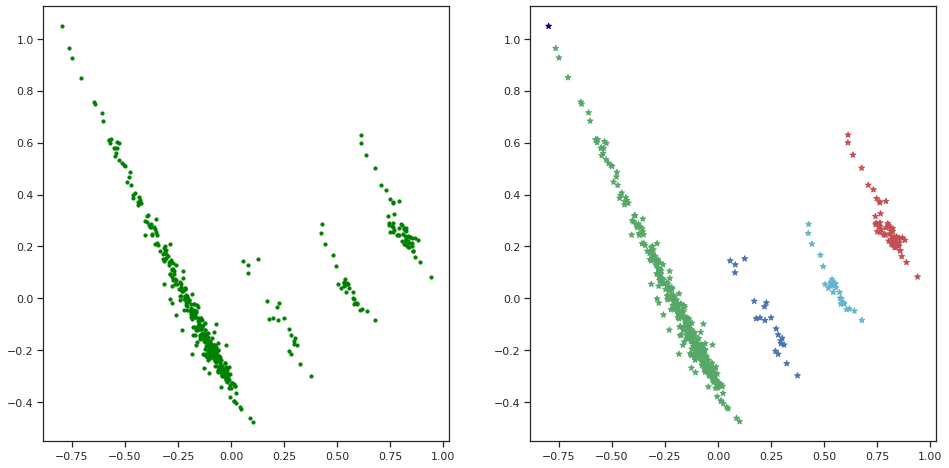

In [225]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[dbscan.labels_], marker='*')

In [226]:
X['Kmeans label'] = kmean.labels_
X['birch'] = birch.labels_
X['dbscan'] = dbscan.labels_
X['risk level'] = y 
X

,Ozono (µg/m3),Dióxido de Azoto (µg/m3),Óxidos de Azoto (µg/m3),Monóxido de Azoto (µg/m3),pollen_intensity,Kmeans label,birch,dbscan,risk level
0,0.109091,0.671677,0.437275,0.172612,0.0,2,0,0,3
1,0.227273,0.628165,0.371142,0.084005,0.0,2,0,0,2
2,0.081818,0.552215,0.616834,0.613349,0.0,2,0,0,1
3,0.200000,0.575158,0.441683,0.071346,0.0,2,0,0,3
4,0.313636,0.502373,0.313828,0.058688,0.0,2,0,0,2
...,...,...,...,...,...,...,...,...,...
451,0.763636,0.219937,0.124649,0.026467,0.0,0,1,0,1
452,0.700000,0.182753,0.104208,0.025316,0.0,0,1,0,1
453,0.622727,0.286392,0.175150,0.037975,0.0,0,1,0,1
454,0.509091,0.328323,0.191182,0.051784,0.0,0,0,0,1


In [227]:
X.to_csv('result.csv', index=False)

In [228]:
X[['Kmeans label', 'birch', 'dbscan', 'risk level']].corr()

,Kmeans label,birch,dbscan,risk level
Kmeans label,1.000000,-0.275825,0.135721,0.134604
birch,-0.275825,1.000000,0.442242,-0.088996
dbscan,0.135721,0.442242,1.000000,-0.057191
risk level,0.134604,-0.088996,-0.057191,1.000000


In [229]:
X['risk level'].value_counts(normalize=True)

2    0.401316
1    0.355263
3    0.243421
Name: risk level, dtype: float64

In [230]:
X[X['Kmeans label']==0]['risk level'].value_counts(normalize=True)

2    0.395189
1    0.395189
3    0.209622
Name: risk level, dtype: float64

In [231]:
X[X['Kmeans label']==1]['risk level'].value_counts(normalize=True)

2    0.369048
1    0.333333
3    0.297619
Name: risk level, dtype: float64

In [232]:
X[X['Kmeans label']==2]['risk level'].value_counts(normalize=True)

2    0.456790
3    0.308642
1    0.234568
Name: risk level, dtype: float64

In [233]:
X[X['birch']==0]['risk level'].value_counts(normalize=True)

2    0.409524
1    0.314286
3    0.276190
Name: risk level, dtype: float64

In [234]:
X[X['birch']==1]['risk level'].value_counts(normalize=True)

2    0.394309
1    0.390244
3    0.215447
Name: risk level, dtype: float64

In [235]:
X[X['birch']==2]['risk level'].value_counts(normalize=True)

Series([], Name: risk level, dtype: float64)

In [236]:
X[X['dbscan']==0]['risk level'].value_counts()

2    142
1    124
3     84
Name: risk level, dtype: int64

In [237]:
X[X['dbscan']==1]['risk level'].value_counts()

3    21
2    20
1    15
Name: risk level, dtype: int64

In [238]:
X[X['dbscan']==2]['risk level'].value_counts()

1    10
2     9
3     2
Name: risk level, dtype: int64

In [239]:
X[X['dbscan']==3]['risk level'].value_counts()

1    13
2    11
3     4
Name: risk level, dtype: int64

In [240]:
X[X['dbscan']==5]['risk level'].value_counts()

Series([], Name: risk level, dtype: int64)

In [241]:
X[X['dbscan']==-1]['risk level'].value_counts()

2    1
Name: risk level, dtype: int64

In [47]:
y = pd.DataFrame(y)

In [48]:
# X

Computing embedding
Done.
ward :	0.00s


/home/amin/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


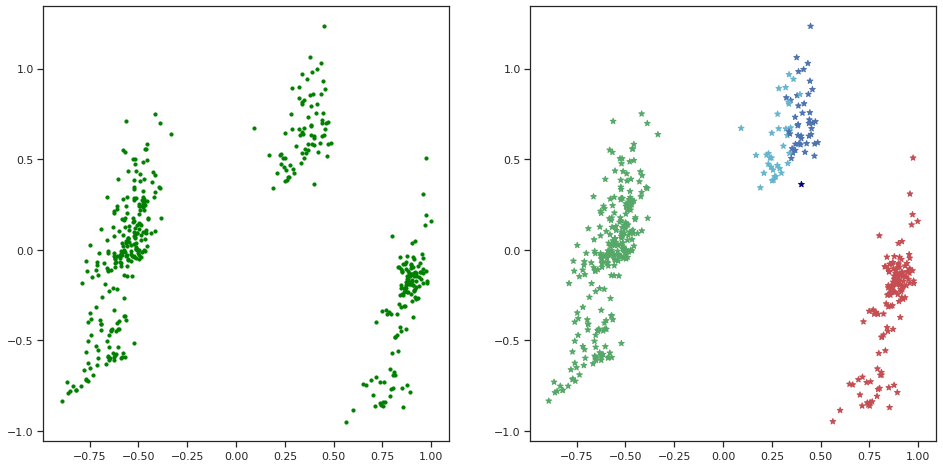

average :	0.00s


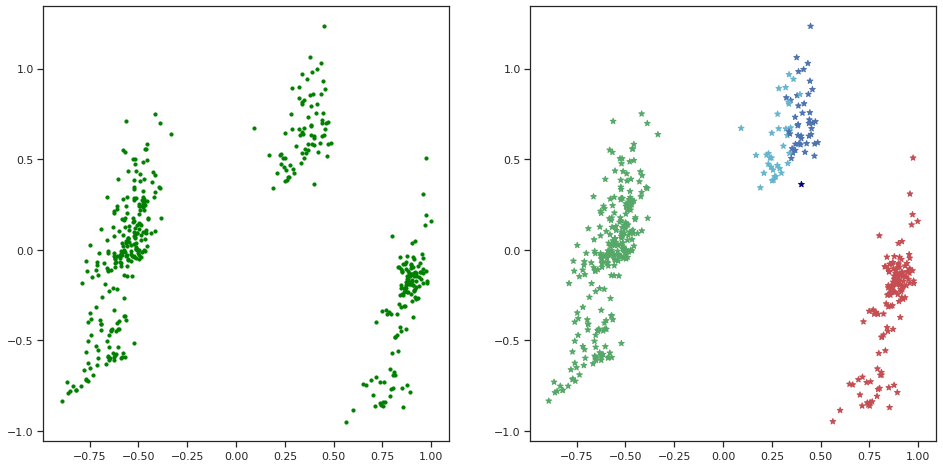

complete :	0.00s


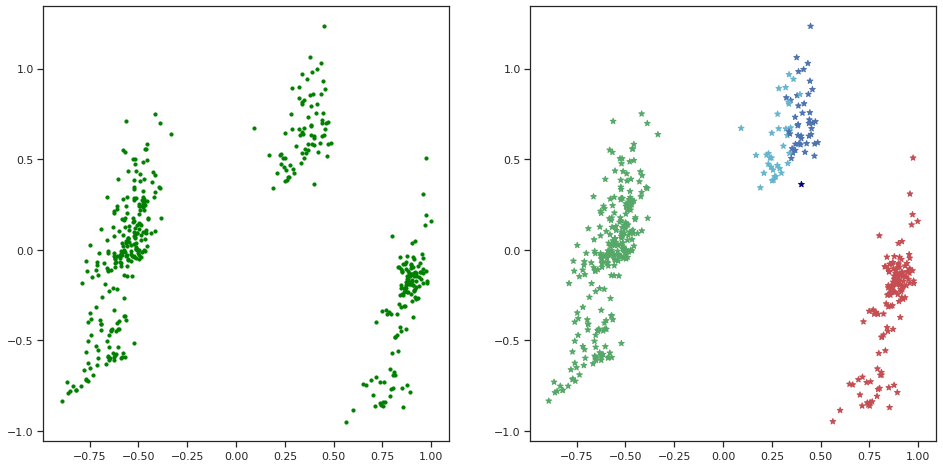

single :	0.00s


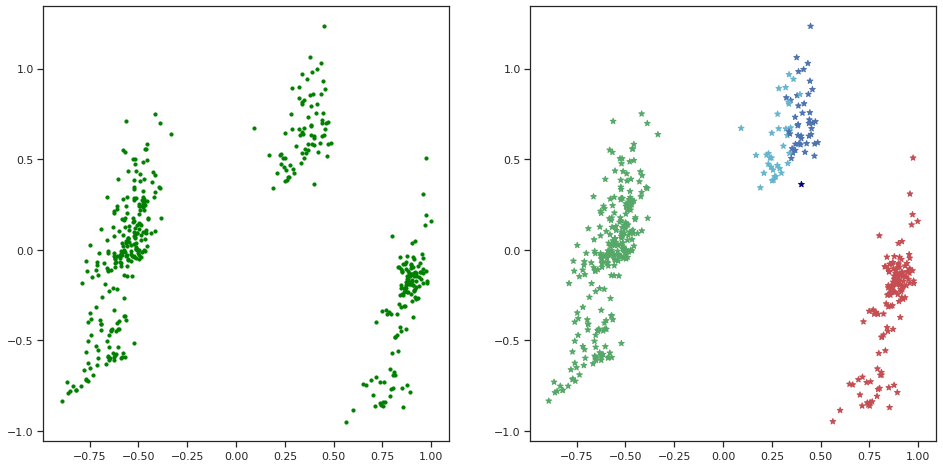

In [49]:
# from sklearn import manifold, datasets
# from time import time

# # digits = datasets.load_digits()
# # X, y = digits.data, digits.target
# n_samples, n_features = X.shape

# # np.random.seed(0)


# # ----------------------------------------------------------------------
# # Visualize the clustering
# def plot_clustering(X_red, labels, title=None):
#     fig = plt.figure(figsize=(16, 8))
#     ax = fig.add_subplot(121)
#     ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
#     ax = fig.add_subplot(122)
#     ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[dbscan.labels_], marker='*')
#     plt.show()


# # ----------------------------------------------------------------------
# # 2D embedding of the digits dataset
# print("Computing embedding")
# X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
# print("Done.")

# from sklearn.cluster import AgglomerativeClustering

# for linkage in ("ward", "average", "complete", "single"):
#     clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
#     t0 = time()
#     clustering.fit(X_PCA)
#     print("%s :\t%.2fs" % (linkage, time() - t0))

#     plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


# plt.show()

In [50]:
# y[1,4,7]